# Machine Learning - Recommendation System example

###### Links: [MovieLens (GroupLens)](https://grouplens.org/datasets/movielens/latest/)  |  [Article ()]()

### 0 - Setup

###### Import pckgs

In [2]:
import warnings
warnings.filterwarnings("ignore")

## for data
import pandas as pd
import numpy as np
import re
from datetime import datetime

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for machine learning
from sklearn import metrics, preprocessing

## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)

###### Import data

In [130]:
# Products
dtf_products = pd.read_excel("data_movies.xlsx", sheet_name="products")

dtf_products["product"] = range(0,len(dtf_products))
dtf_products["name"] = dtf_products["title"].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip())
dtf_products["date"] = dtf_products["title"].apply(lambda x: x.split("(")[-1].replace(")","").strip() if "(" in x else "")
dtf_products["date"] = dtf_products["date"].apply(lambda x: x.split("–")[0] if "–" in x else x)

dtf_products

,movieId,title,genres,product,name,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,2,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,4,Father of the Bride Part II,1995
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,9737,Black Butler: Book of the Atlantic,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,9738,No Game No Life: Zero,2017
9739,193585,Flint (2017),Drama,9739,Flint,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,9740,Bungo Stray Dogs: Dead Apple,2018


In [3]:
# Products
dtf_products = pd.read_csv("movies.csv")

dtf_products["product"] = range(0,len(dtf_products))
dtf_products["name"] = dtf_products["title"].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip())
dtf_products["date"] = dtf_products["title"].apply(lambda x: x.split("(")[-1].replace(")","").strip() if "(" in x else "")
dtf_products["date"] = dtf_products["date"].apply(lambda x: x.split("–")[0] if "–" in x else x)

dtf_products

,movieId,title,genres,product,name,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,2,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,4,Father of the Bride Part II,1995
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,9737,Black Butler: Book of the Atlantic,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,9738,No Game No Life: Zero,2017
9739,193585,Flint (2017),Drama,9739,Flint,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,9740,Bungo Stray Dogs: Dead Apple,2018


In [132]:
# Users
dtf_users = pd.read_excel("data_movies.xlsx", sheet_name="users").head(10000)

dtf_users["user"] = dtf_users["userId"].apply(lambda x: x-1)
dtf_users["timestamp"] = dtf_users["timestamp"].apply(lambda x: datetime.fromtimestamp(x))
dtf_users["time"] = dtf_users["timestamp"].apply(lambda x: x.strftime("%H"))

dtf_users = dtf_users.merge(dtf_products[["movieId","product"]], how="left")
dtf_users = dtf_users.rename(columns={"rating":"y"})

dtf_users

,userId,movieId,y,timestamp,user,time,product
0,1,1,4.0,2000-07-30 20:45:03,0,20,0
1,1,3,4.0,2000-07-30 20:20:47,0,20,2
2,1,6,4.0,2000-07-30 20:37:04,0,20,5
3,1,47,5.0,2000-07-30 21:03:35,0,21,43
4,1,50,5.0,2000-07-30 20:48:51,0,20,46
...,...,...,...,...,...,...,...
9995,66,248,3.0,2005-04-11 05:41:32,65,05,212
9996,66,255,0.5,2005-04-11 05:07:20,65,05,219
9997,66,260,2.5,2004-08-29 04:45:50,65,04,224
9998,66,272,3.5,2005-04-11 05:31:59,65,05,234


In [127]:
# Users
dtf_users = pd.read_csv("ratings.csv").head(10000)

dtf_users["user"] = dtf_users["userId"].apply(lambda x: x-1)
dtf_users["timestamp"] = dtf_users["timestamp"].apply(lambda x: datetime.fromtimestamp(x))
dtf_users["time"] = dtf_users["timestamp"].apply(lambda x: x.strftime("%H"))

dtf_users = dtf_users.merge(dtf_products[["movieId","product"]], how="left")
dtf_users = dtf_users.rename(columns={"rating":"y"})

dtf_users

,userId,movieId,y,timestamp,user,time,product
0,1,1,4.0,2000-07-30 20:45:03,0,20,0
1,1,3,4.0,2000-07-30 20:20:47,0,20,2
2,1,6,4.0,2000-07-30 20:37:04,0,20,5
3,1,47,5.0,2000-07-30 21:03:35,0,21,43
4,1,50,5.0,2000-07-30 20:48:51,0,20,46
...,...,...,...,...,...,...,...
9995,66,248,3.0,2005-04-11 05:41:32,65,05,212
9996,66,255,0.5,2005-04-11 05:07:20,65,05,219
9997,66,260,2.5,2004-08-29 04:45:50,65,04,224
9998,66,272,3.5,2005-04-11 05:31:59,65,05,234


In [5]:
# select only useful columns
dtf_products = dtf_products[["product","name","date","genres"]].set_index("product")
dtf_products.head()

,name,date,genres
product,,,
0,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji,1995,Adventure|Children|Fantasy
2,Grumpier Old Men,1995,Comedy|Romance
3,Waiting to Exhale,1995,Comedy|Drama|Romance
4,Father of the Bride Part II,1995,Comedy


In [6]:
dtf_users = dtf_users[["user","product","time","y"]]
dtf_users.head()

,user,product,time,y
0,0,0,20,4.0
1,0,2,20,4.0
2,0,5,20,4.0
3,0,43,21,5.0
4,0,46,20,5.0


### 1 - Data Analysis

###### Products

In [7]:
tags = [i.split("|") for i in dtf_products["genres"].unique()]
columns = list(set([i for lst in tags for i in lst]))
columns.remove("IMAX")
columns.remove('(no genres listed)')
print(columns)

['Action', 'Mystery', 'Documentary', 'Children', 'Romance', 'Drama', 'Sci-Fi', 'Fantasy', 'War', 'Musical', 'Western', 'Horror', 'Animation', 'Thriller', 'Comedy', 'Film-Noir', 'Adventure', 'Crime']


In [8]:
for col in columns:
    dtf_products[col] = dtf_products["genres"].apply(lambda x: 1 if col in x else 0)
dtf_products.head()

,name,date,genres,Action,Mystery,Documentary,Children,Romance,Drama,Sci-Fi,...,War,Musical,Western,Horror,Animation,Thriller,Comedy,Film-Noir,Adventure,Crime
product,,,,,,,,,,,,,,,,,,,,,
0,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,Jumanji,1995,Adventure|Children|Fantasy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Grumpier Old Men,1995,Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Waiting to Exhale,1995,Comedy|Drama|Romance,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,Father of the Bride Part II,1995,Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


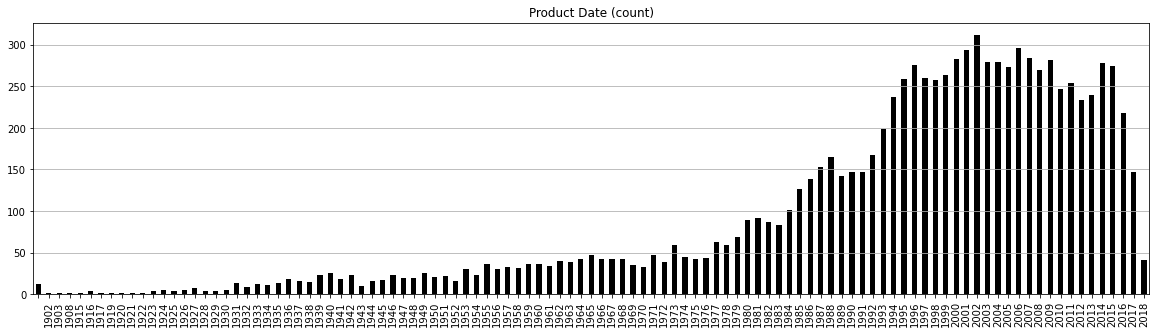

In [9]:
dtf_products["date"].value_counts().sort_index().plot(kind="bar", color="black", title="Product Date (count)", 
                                                      figsize=(20,5)).grid(axis='y')
plt.show()

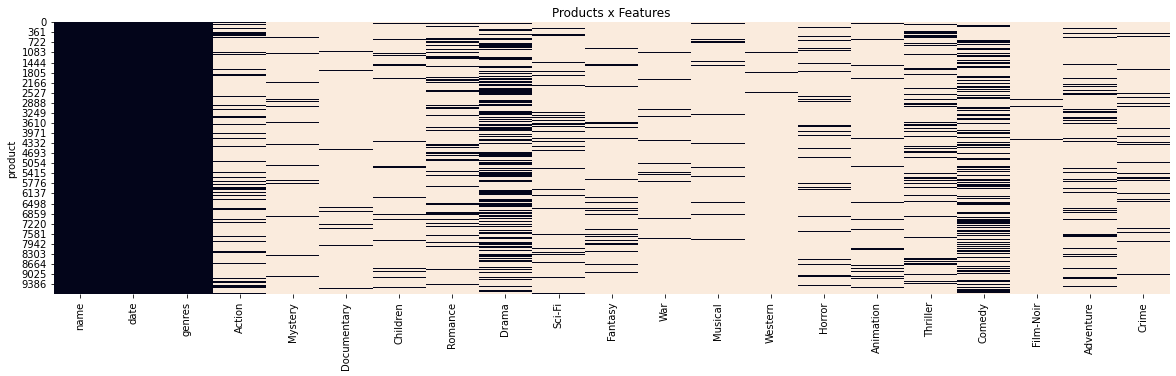

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(dtf_products==0, vmin=0, vmax=1, cbar=False, ax=ax).set_title("Products x Features")
plt.show()

###### Users

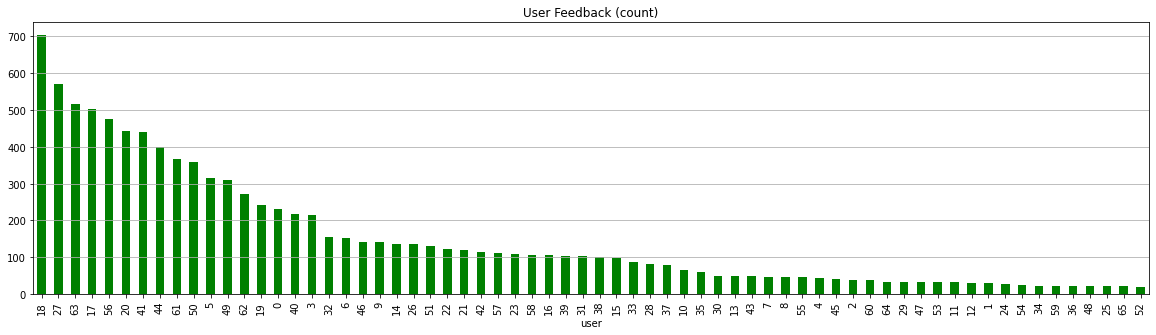

In [11]:
dtf_users.groupby("user").count()["product"].sort_values(ascending=False).plot(
    kind="bar", color="green", title="User Feedback (count)", figsize=(20,5)).grid(axis='y')

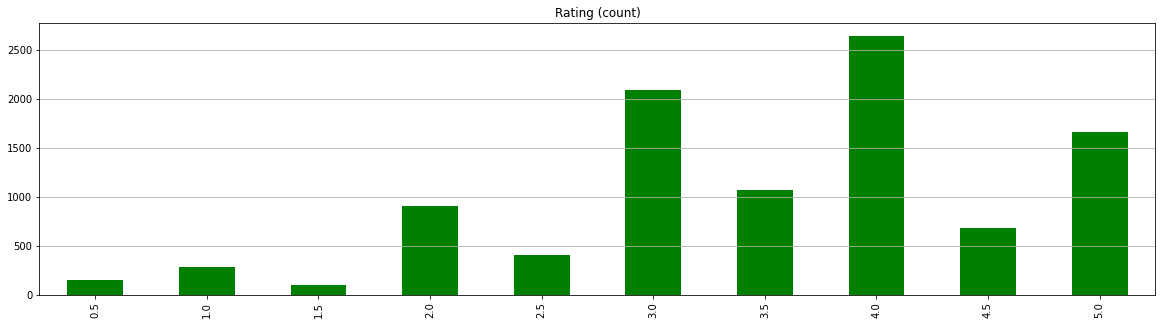

In [12]:
dtf_users["y"].value_counts().sort_index().plot(kind="bar", color="green", title="Rating (count)", 
                                                figsize=(20,5)).grid(axis='y')
plt.show()

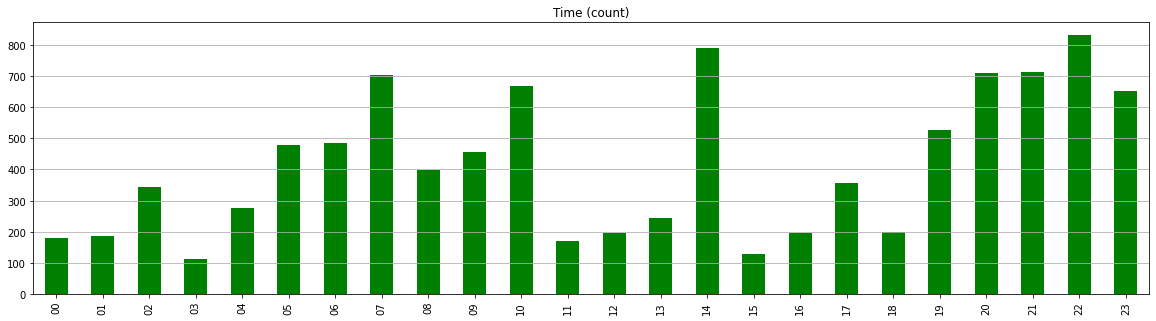

In [13]:
dtf_users["time"].value_counts().sort_index().plot(kind="bar", color="green", title="Time (count)",
                                                   figsize=(20,5)).grid(axis='y')
plt.show()

In [14]:
tmp = dtf_users.copy()
dtf_users = tmp.pivot_table(index="user", columns="product", values="y")
missing_cols = list(set(dtf_products.index) - set(dtf_users.columns))
for col in missing_cols:
    dtf_users[col] = np.nan
dtf_users = dtf_users[sorted(dtf_users.columns)]
dtf_users

product,0,1,2,3,4,5,6,7,8,9,...,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741
user,,,,,,,,,,,,,,,,,,,,,
0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,4.0,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,4.0,NaN,3.5,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


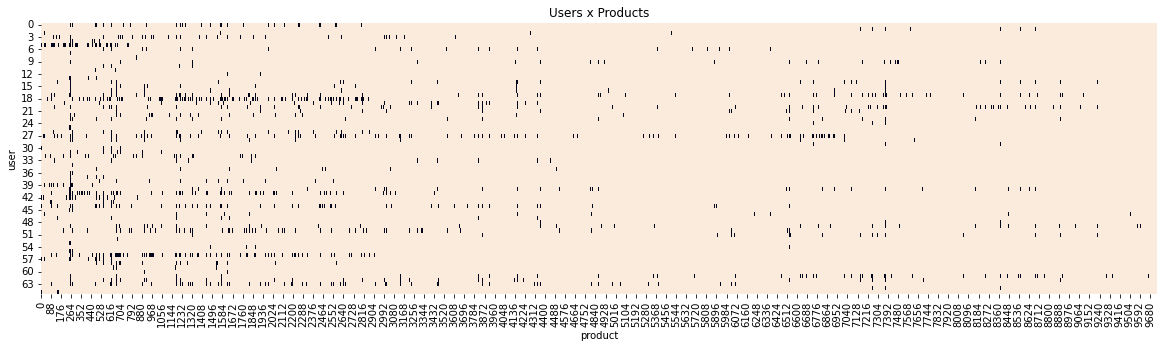

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(dtf_users.isnull(), vmin=0, vmax=1, cbar=False, ax=ax).set_title("Users x Products")
plt.show()

### 2 - Preprocessing

- Scaling
- Partitioning

###### Scaling

In [16]:
dtf_users = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0.5,1)).fit_transform(dtf_users.values), 
                         columns=dtf_users.columns, index=dtf_users.index)
dtf_users

product,0,1,2,3,4,5,6,7,8,9,...,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741
user,,,,,,,,,,,,,,,,,,,,,
0,0.8,NaN,0.750,NaN,NaN,0.750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,0.833333,NaN,NaN,NaN,0.875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,0.8,NaN,0.625,NaN,NaN,0.875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Partitioning

In [17]:
split = int(0.8*dtf_users.shape[1])
split

7793

In [43]:
# Train
dtf_train = dtf_users.loc[:, :split-1]
print("non-null data:", dtf_train[dtf_train>0].count().sum())
dtf_train

non-null data: 9329


product,0,1,2,3,4,5,6,7,8,9,...,7783,7784,7785,7786,7787,7788,7789,7790,7791,7792
user,,,,,,,,,,,,,,,,,,,,,
0,0.8,NaN,0.750,NaN,NaN,0.750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,0.833333,NaN,NaN,NaN,0.875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,0.8,NaN,0.625,NaN,NaN,0.875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Test
dtf_test = dtf_users.loc[:, split:]
print("non-null data:", dtf_test[dtf_test>0].count().sum())
dtf_test

non-null data: 671


product,7793,7794,7795,7796,7797,7798,7799,7800,7801,7802,...,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741
user,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3 - Baseline (Content-Based)

In [119]:
# Select a user
i = 1
train = dtf_train.iloc[i].to_frame(name="y")
test = dtf_test.iloc[i].to_frame(name="y")

print("train:", len(train[~train["y"].isna()]), "| test:", len(test[~test["y"].isna()]))
test.head()

train: 21 | test: 8


,y
product,
7793,NaN
7794,NaN
7795,NaN
7796,NaN
7797,NaN


In [120]:
# add all products in test but empty
tmp = test.copy()
tmp["y"] = np.nan
train = train.append(tmp)
train.tail()

,y
product,
9737,NaN
9738,NaN
9739,NaN
9740,NaN
9741,NaN


In [121]:
# Model
usr = train[["y"]].fillna(0).values.T
prd = dtf_products.drop(["name","date","genres"],axis=1).values
print("Users", usr.shape, " x  Products", prd.shape)

Users (1, 9742)  x  Products (9742, 18)


In [106]:
# Numpy
import numpy as np

## usr_ft(users,fatures) = usr(users,products) x prd(products,features)
usr_ft = np.dot(usr, prd)
## normalize
weights = usr_ft / usr_ft.sum()
## predicted rating(users,products) = weights(users,fatures) x prd.T(features,products)
pred = np.dot(weights, prd.T)

test = test.merge(pd.DataFrame(pred[0], columns=["yhat"]), how="left", left_index=True, right_index=True).reset_index()
test = test[~test["y"].isna()]
test

,product,y,yhat
270,8063,0.812500,0.408292
512,8305,1.000000,0.494663
583,8376,0.777778,0.022086
673,8466,0.800000,0.241638
716,8509,0.500000,0.535976
757,8550,0.875000,0.400281
888,8681,1.000000,0.366783
1035,8828,0.500000,0.037270


In [122]:
# Tensorflow
import tensorflow as tf

## usr_ft(users,fatures) = usr(users,products) x prd(products,features)
usr_ft = tf.matmul(usr, prd)
## normalize
weights = usr_ft / tf.reduce_sum(usr_ft, axis=1, keepdims=True)
## rating(users,products) = weights(users,fatures) x prd.T(features,products)
pred = tf.matmul(weights, prd.T)

test = test.merge(pd.DataFrame(pred[0], columns=["yhat"]), how="left", left_index=True, right_index=True).reset_index()
test = test[~test["y"].isna()]
test

,product,y,yhat
270,8063,0.812500,0.408292
512,8305,1.000000,0.494663
583,8376,0.777778,0.022086
673,8466,0.800000,0.241638
716,8509,0.500000,0.535976
757,8550,0.875000,0.400281
888,8681,1.000000,0.366783
1035,8828,0.500000,0.037270


In [107]:
# Evaluate
def mean_reciprocal_rank(y_test, predicted):
    score = 0
    for product in y_test:
        if product in predicted:
            score += 1 / (list(predicted).index(product) + 1)
    return score

In [108]:
print("--- user", i, "---")

top = 5
y_test = test.sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test.sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", mean_reciprocal_rank(y_test, predicted))

--- user 1 ---
y_test: [8305 8681 8550 8063 8466]
predicted: [8509 8305 8063 8550 8681]
true positive: 4 (80.0%)
accuracy: 0.0%
mrr: 1.2833333333333332


In [123]:
test.merge(
        dtf_products[["name","date","genres"]], left_on="product", right_index=True
    ).sort_values("yhat", ascending=False)

,product,y,yhat,name,date,genres
716,8509,0.500000,0.535976,The Drop,2014,Crime|Drama|Thriller
512,8305,1.000000,0.494663,"Wolf of Wall Street, The",2013,Comedy|Crime|Drama
270,8063,0.812500,0.408292,Django Unchained,2012,Action|Drama|Western
757,8550,0.875000,0.400281,Ex Machina,2015,Drama|Sci-Fi|Thriller
888,8681,1.000000,0.366783,Mad Max: Fury Road,2015,Action|Adventure|Sci-Fi|Thriller
673,8466,0.800000,0.241638,Whiplash,2014,Drama
1035,8828,0.500000,0.037270,The Jinx: The Life and Deaths of Robert Durst,2015,Documentary
583,8376,0.777778,0.022086,Interstellar,2014,Sci-Fi|IMAX


### 4 - Model Desing & Testing (Collaborative Filtering)

###### Data

In [23]:
train = dtf_train.stack(dropna=True).reset_index().rename(columns={0:"y"})
train.head()

,user,product,y
0,0,0,0.80
1,0,2,0.75
2,0,5,0.75
3,0,43,1.00
4,0,46,1.00


In [24]:
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0:"y"})
test.head()

,user,product,y
0,1,8063,0.812500
1,1,8305,1.000000
2,1,8376,0.777778
3,1,8466,0.800000
4,1,8509,0.500000


###### Model Design

In [456]:
embeddings_size = 50
n = dtf_users.shape[0]
m = dtf_users.shape[1]

# Users (n,1,embedding_size) and Reshape (n,embedding_size)
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xusers_emb = layers.Embedding(name="xusers_emb", input_dim=n, output_dim=embeddings_size)(xusers_in)
xusers = layers.Reshape(name='xusers', target_shape=(embeddings_size,))(xusers_emb)

# Products (m,1,embedding_size) and Reshape (m,embedding_size)
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))
xproducts_emb = layers.Embedding(name="xproducts_emb", input_dim=m, output_dim=embeddings_size)(xproducts_in)
xproducts = layers.Reshape(name='xproducts', target_shape=(embeddings_size,))(xproducts_emb)

# Product (N,1)
xx = layers.Dot(name='xx', normalize=True, axes=1)([xusers, xproducts])

# Predict ratings (N,1)
y_out = layers.Dense(name="y_out", units=1, activation='linear')(xx)

# Compile
model = models.Model(inputs=[xusers_in,xproducts_in], outputs=y_out, name="CollaborativeFiltering")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "CollaborativeFiltering"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xusers_in (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
xproducts_in (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
xusers_emb (Embedding)          (None, 1, 50)        3300        xusers_in[0][0]                  
__________________________________________________________________________________________________
xproducts_emb (Embedding)       (None, 1, 50)        487100      xproducts_in[0][0]               
_____________________________________________________________________________

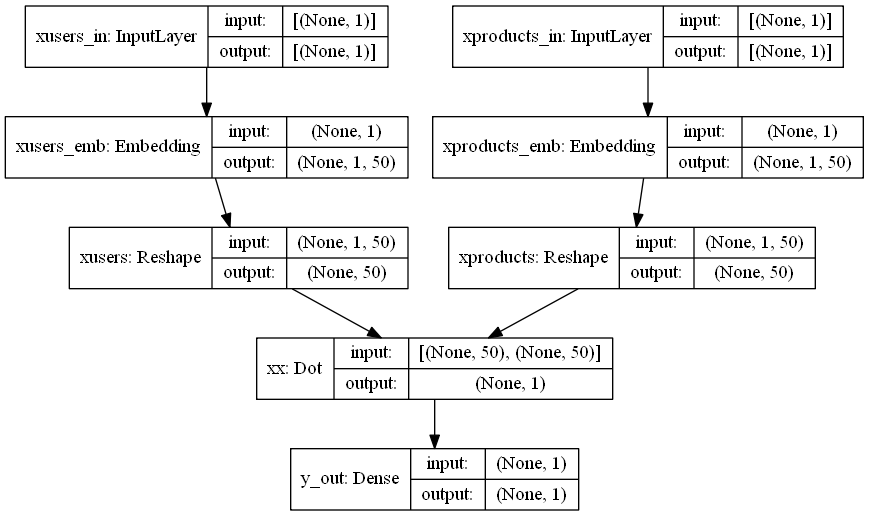

In [457]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

###### Train / Test

In [26]:
'''
Plot loss and metrics of keras training.
'''
def utils_plot_keras_training(training):
    metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
    
    ## training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(training.history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()
    
    ## validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(training.history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")
    plt.show()

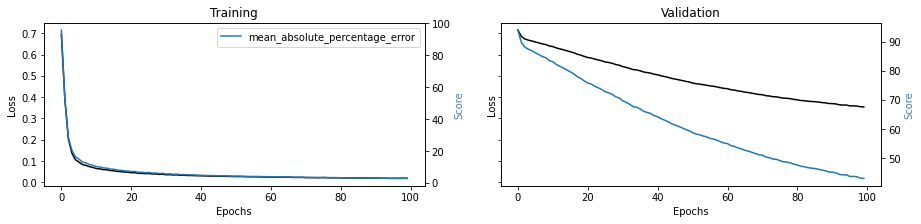

In [459]:
# train
training = model.fit(x=[train["user"], train["product"]], y=train["y"], 
                     epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)
model = training.model
utils_plot_keras_training(training)

In [460]:
# test
test["yhat"] = model.predict([test["user"], test["product"]])
test

,user,product,y,yhat
0,1,8063,0.812500,0.218008
1,1,8305,1.000000,0.459976
2,1,8376,0.777778,0.451900
3,1,8466,0.800000,0.663183
4,1,8509,0.500000,0.462220
...,...,...,...,...
666,64,8023,0.500000,0.314262
667,64,8376,0.944444,0.376409
668,64,8438,0.666667,0.472558
669,64,8569,0.900000,0.258851


###### Evaluate

In [541]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

Mean Absolute Error (Σ|y-pred|/n): 0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.71%


In [533]:
# single case
i = 1
print("--- user", i, "---")

top = 5
y_test = test[test["user"]==i].sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test[test["user"]==i].sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", mean_reciprocal_rank(y_test, predicted))

--- user 1 ---
y_test: [8305 8681 8550 8063 8466]
predicted: [8466 8681 8509 8305 8376]
true positive: 3 (60.0%)
accuracy: 20.0%
mrr: 1.75


In [39]:
test[test["user"]==i].merge(
        dtf_products[["name","date","genres"]], left_on="product", right_index=True
    ).sort_values("yhat", ascending=False)

,user,product,y,yhat,name,date,genres
6,1,8681,1.000000,0.760493,Mad Max: Fury Road,2015,Action|Adventure|Sci-Fi|Thriller
0,1,8063,0.812500,0.760048,Django Unchained,2012,Action|Drama|Western
4,1,8509,0.500000,0.733584,The Drop,2014,Crime|Drama|Thriller
5,1,8550,0.875000,0.716462,Ex Machina,2015,Drama|Sci-Fi|Thriller
2,1,8376,0.777778,0.682796,Interstellar,2014,Sci-Fi|IMAX
3,1,8466,0.800000,0.608599,Whiplash,2014,Drama
7,1,8828,0.500000,0.598527,The Jinx: The Life and Deaths of Robert Durst,2015,Documentary
1,1,8305,1.000000,0.588954,"Wolf of Wall Street, The",2013,Comedy|Crime|Drama


### 5 - Hybrid Model (Neural Collaborative Filtering)

###### Data

In [ ]:
train = dtf_train.stack(dropna=True).reset_index().rename(columns={0:"y"})
train.head()

In [ ]:
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0:"y"})
test.head()

###### Model Design

In [20]:
embeddings_size = 50
n = dtf_users.shape[0]
m = dtf_users.shape[1]

# Input layer
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

# A) Matrix Factorization
## embeddings and reshape
cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=n, output_dim=embeddings_size)(xusers_in)
cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)
## embeddings and reshape
cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=m, output_dim=embeddings_size)(xproducts_in)
cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)
## product
cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])

# B) Neural Network
## embeddings and reshape
nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=n, output_dim=embeddings_size)(xusers_in)
nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)
## embeddings and reshape
nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=m, output_dim=embeddings_size)(xproducts_in)
nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)
## concat and dense
nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
nn_xx = layers.Dense(name="nn_xx", units=embeddings_size/2, activation='relu')(nn_xx)

# Merge A & B
y_out = layers.Concatenate()([cf_xx, nn_xx])
y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)

# Compile
model = models.Model(inputs=[xusers_in,xproducts_in], outputs=y_out, name="Neural_CollaborativeFiltering")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "Neural_CollaborativeFiltering"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xusers_in (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
xproducts_in (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
nn_xusers_emb (Embedding)       (None, 1, 50)        3300        xusers_in[0][0]                  
__________________________________________________________________________________________________
nn_xproducts_emb (Embedding)    (None, 1, 50)        487100      xproducts_in[0][0]               
______________________________________________________________________

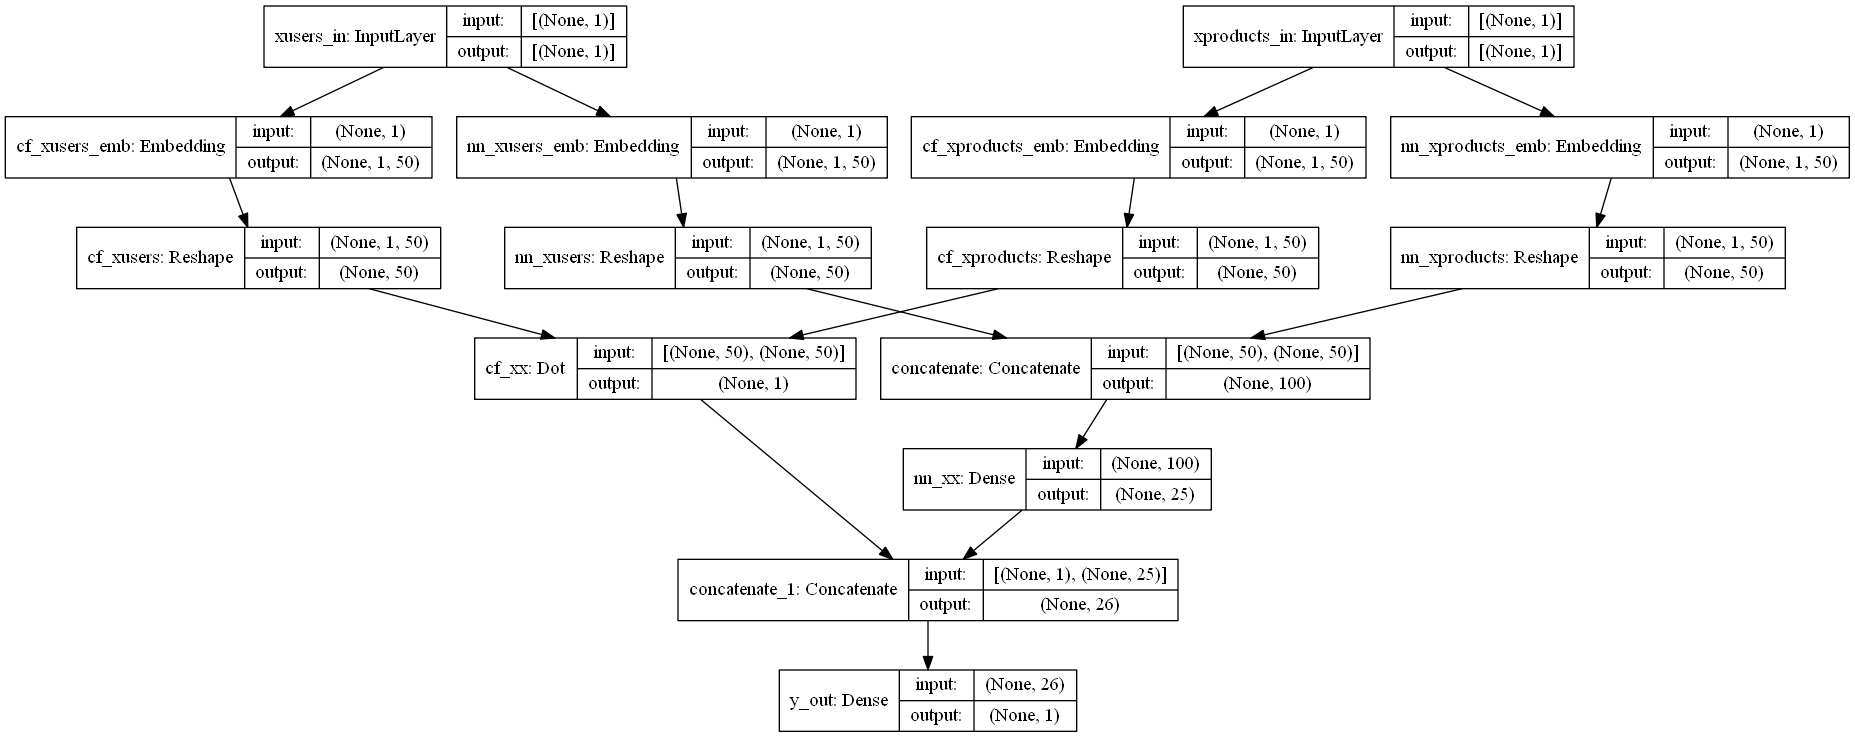

In [21]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

###### Train / Test

In [25]:
# train
training = model.fit(x=[train["user"], train["product"]], y=train["y"], 
                     epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)
model = training.model
utils_plot_keras_training(training)

NameError: name 'utils_plot_keras_training' is not defined

In [29]:
# test
test["yhat"] = model.predict([test["user"], test["product"]])
test

,user,product,y,yhat
0,1,8063,0.812500,0.760048
1,1,8305,1.000000,0.588954
2,1,8376,0.777778,0.682796
3,1,8466,0.800000,0.608599
4,1,8509,0.500000,0.733584
...,...,...,...,...
666,64,8023,0.500000,0.557444
667,64,8376,0.944444,0.467789
668,64,8438,0.666667,0.524311
669,64,8569,0.900000,0.563960


###### Evaluate

In [30]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

Mean Absolute Error (Σ|y-pred|/n): 0
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.36%


In [35]:
# single case
i = 1
print("--- user", i, "---")

top = 5
y_test = test[test["user"]==i].sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test[test["user"]==i].sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", mean_reciprocal_rank(y_test, predicted))

--- user 1 ---
y_test: [8305 8681 8550 8063 8466]
predicted: [8681 8063 8509 8550 8376]
true positive: 3 (60.0%)
accuracy: 0.0%
mrr: 1.75


In [38]:
test[test["user"]==i].merge(
        dtf_products[["name","date","genres"]], left_on="product", right_index=True
    ).sort_values("yhat", ascending=False)

,user,product,y,yhat,name,date,genres
6,1,8681,1.000000,0.760493,Mad Max: Fury Road,2015,Action|Adventure|Sci-Fi|Thriller
0,1,8063,0.812500,0.760048,Django Unchained,2012,Action|Drama|Western
4,1,8509,0.500000,0.733584,The Drop,2014,Crime|Drama|Thriller
5,1,8550,0.875000,0.716462,Ex Machina,2015,Drama|Sci-Fi|Thriller
2,1,8376,0.777778,0.682796,Interstellar,2014,Sci-Fi|IMAX
3,1,8466,0.800000,0.608599,Whiplash,2014,Drama
7,1,8828,0.500000,0.598527,The Jinx: The Life and Deaths of Robert Durst,2015,Documentary
1,1,8305,1.000000,0.588954,"Wolf of Wall Street, The",2013,Comedy|Crime|Drama
